In [890]:
import pandas as pd
import ast
import numpy as np
import requests
import os
import json
import matplotlib 
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline

In [891]:
pd.options.display.max_colwidth = 900
pd.options.display.max_rows = 118

## Gathering Data

##### 1. Twitter Archived Enhanced Data

In [892]:
tw_df_enhanced= pd.read_csv('twitter-archive-enhanced.csv')
tw_df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


##### 2. Image Predictions Data

In [893]:
## by use request library, to download a file that hosted in udacity servers:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
resualt = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(resualt.content)
    
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [894]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API

In [895]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [896]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [897]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [898]:
json_tw = pd.read_json('tweet-json.txt',lines=True)
json_tw.to_csv('json_tw.csv' , index=False)

In [899]:
json_tw = pd.read_csv('json_tw.csv')

In [900]:
json_tw.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

## Assessing Data

### Visual assessment:
### we have three dataframes : 
#### 1- tw_df_enhanced
#### 2- df_image_predictions
#### 3- json_tw

In [901]:
tw_df_enhanced.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [902]:
tw_df_enhanced.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

In [903]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [904]:
df_image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [905]:
json_tw.head(30)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

In [906]:
json_tw.tail(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2344,2015-11-16 01:01:59+00:00,666058600524156928,666058600524156928,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666058597072306176, 'id_str': '666058597072306176', 'indices': [112, 135], 'media_url': 'http://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg', 'url': 'https://t.co/pYAJkAe76p', 'display_url': 'pic.twitter.com/pYAJkAe76p', 'expanded_url': 'https://twitter.com/dog_rates/status/666058600524156928/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 600, 'h': 600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 340, 'h': 340, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}","{'media': [{'id': 666058597072306176, 'id_str': '666058597072306176', 'indices': [112, 135], 'media_url': 'http://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg', 'url': 'https://t.co/pYAJkAe76p', 'display_url': 'pic.twitter.com/pYAJkAe76p', 'expanded_url': 'https://twitter.com/dog_rates/status/666058600524156928/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 600, 'h': 600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 340, 'h': 340, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,115,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2345,2015-11-16 00:55:59+00:00,666057090499244032,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,False,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666057085227016192, 'id_str': '666057085227016192', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg', 'url': 'https://t.co/yWBqbrzy8O', 'display_url': 'pic.twitter.com/yWBqbrzy8O', 'expanded_url': 'https://twitter.com/dog_rates/status/666057090499244032/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 405, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 340, 'h': 255, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 405, 'resize': 'fit'}}}]}","{'media': [{'id': 666057085227016192, 'id_str': '666057085227016192', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg', 'url': 'https://t.co/yWBqbrzy8O', 'display_url': 'pic.twitter.com/yWBqbrzy8O', 'expanded_url': 'https://twitter.com/dog_rates/status/666057090499244032/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 405, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 340, 'h': 255, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 405, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,304,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2346,2015-11-16 00:49:46+00:00,666055525042405380,666055525042405376,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666055517517848576, 'id_str': '666055517517848576', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/medi

## Programmatic assessment:
#### 1 - tw_df_enhanced

In [907]:
tw_df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [908]:
tw_df_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [909]:
sum(tw_df_enhanced.duplicated())

0

In [910]:
sum(tw_df_enhanced.retweeted_status_id.isnull())

2175

In [911]:
len(tw_df_enhanced[tw_df_enhanced.expanded_urls.isnull()])

59

In [912]:
tw_df_enhanced.query('rating_denominator > 10') ## we have 20 records that above 10 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

In [913]:
tw_df_enhanced.name.value_counts().head(100)

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
Buddy         7
Daisy         7
an            7
Bailey        7
Bella         6
Leo           6
Milo          6
Koda          6
Stanley       6
Dave          6
Rusty         6
Jack          6
Jax           6
Oscar         6
Scout         6
very          5
Sunny         5
Louis         5
Gus           5
Finn          5
Bentley       5
Sammy         5
Alfie         5
Larry         5
Oakley        5
Chester       5
Phil          5
George        5
Riley         4
Sampson       4
Luna          4
Brody         4
Moose         4
Maggie        4
Derek         4
quite         4
Jerry         4
one           4
Maximus       4
Carl          4
Boomer        4
Shadow        4
Bruce         4
Gary          4
Sophie        4
Archie        4
Ruby          4
Walter        4
Reggie  

In [914]:
tw_df_enhanced.name.value_counts().tail(100)

Wesley          1
Sephie          1
Maisey          1
Binky           1
Cecil           1
Toffee          1
Meera           1
Pumpkin         1
Iroh            1
Gin             1
Sojourner       1
Philippe        1
Oddie           1
Butters         1
DonDon          1
Fletcher        1
Remy            1
Vinscent        1
Lacy            1
Tedrick         1
Linus           1
Shawwn          1
Josep           1
Eazy            1
Brian           1
Naphaniel       1
Sky             1
Jennifur        1
Rizzo           1
Geoff           1
Finnegus        1
River           1
Jo              1
Skye            1
Lucia           1
Barclay         1
Coleman         1
Jed             1
Kara            1
Bode            1
Berb            1
Brutus          1
Ester           1
Danny           1
Cleopatricia    1
Ridley          1
Ember           1
incredibly      1
Wiggles         1
Bayley          1
Mitch           1
Anthony         1
Nida            1
Duddles         1
Edgar           1
Amber     

#### 2 - df_image_predictions

In [915]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [916]:
sum(df_image_predictions.duplicated())

0

In [917]:
df_image_predictions[df_image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 3- json_tw

In [918]:
json_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   int64  
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

In [919]:
sum(json_tw.duplicated())

0

In [920]:
json_tw[json_tw.retweeted_status.notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Athletics', 'name': ""Oakland A's 🌳🐘⚾️"", 'id': 19607400, 'id_str': '19607400', 'indices': [3, 13]}], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [27, 50]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,0,False,False,0.0,0.0,und,"{'created_at': 'Sat Jul 15 02:44:07 +0000 2017', 'id': 886053734421102592, 'id_str': '886053734421102592', 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo', 'truncated': False, 'display_text_range': [0, 11], 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [12, 35]}]}, 'source': '<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19607400, 'id_str': '19607400', 'name': ""Oakland A's 🌳🐘⚾️"", 'screen_name': 'Athletics', 'location': 'Oakland, CA', 'description': 'Official ...",8.860534e+17,8.860534e+17,NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 830583314243268608, 'id_str': '830583314243268608', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'url': 'https://t.co/SATN4If5H5', 'display_url': 'pic.twitter.com/SATN4If5H5', 'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}}, 'source_status_id': 830583320585068544, 'source_status_id_str': '830583320585068544', 'source_use...","{'media': [{'id': 830583314243268608, 'id_str': '830583314243268608', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'url': 'https://t.co/SATN4If5H5', 'display_url': 'pic.twitter.com/SATN4If5H5', 'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}}, 'source_status_id': 830583320585068544, 'source_status_id_str': '830583320585068544', 'source_user_id': 4196983835, 'source_user_id_str': '4196983835'}, {'id': 830583314213896192, 'id_str': '830583314213896192', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/C4bTH6g...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,0,False

In [921]:
json_tw[json_tw.quoted_status_id.notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Athletics', 'name': ""Oakland A's 🌳🐘⚾️"", 'id': 19607400, 'id_str': '19607400', 'indices': [3, 13]}], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [27, 50]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,0,False,False,0.0,0.0,und,"{'created_at': 'Sat Jul 15 02:44:07 +0000 2017', 'id': 886053734421102592, 'id_str': '886053734421102592', 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo', 'truncated': False, 'display_text_range': [0, 11], 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [12, 35]}]}, 'source': '<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19607400, 'id_str': '19607400', 'name': ""Oakland A's 🌳🐘⚾️"", 'screen_name': 'Athletics', 'location': 'Oakland, CA', 'description': 'Official ...",8.860534e+17,8.860534e+17,NaN
34,2017-07-13 15:19:09+00:00,885518971528720385,885518971528720384,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,False,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/gzLHboL7Sk', 'expanded_url': 'https://twitter.com/4bonds2carbon/status/885517367337512960', 'display_url': 'twitter.com/4bonds2carbon/…', 'indices': [48, 71]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,20788,False,False,0.0,0.0,en,NaN,8.855174e+17,8.855174e+17,"{'created_at': 'Thu Jul 13 15:12:47 +0000 2017', 'id': 885517367337512960, 'id_str': '885517367337512960', 'full_text': ""@dog_rates my goldendoodle Howard had a spinal cord injury and worked really hard in physical therapy to walk again. He's a good boy https://t.co/AW5cZ1N0ZF"", 'truncated': False, 'display_text_range': [0, 133], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [0, 10]}], 'urls': [], 'media': [{'id': 885517277063516160, 'id_str': '885517277063516160', 'indices': [134, 157], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/885517277063516160/pu/img/nAtvq2LwSA5E9CSS.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/885517277063516160/pu/img/nAtvq2LwSA5E9CSS.jpg', 'url': 'https://t.co/AW5cZ1N0ZF', 'display_url': 'pic.twitt..."
41,2017-07-10 03:08:17+00:00,884247878851493888,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/uF3pQ8Wubj', 'expanded_url': 'https://twitter.com/kaijohnson_19/status/883965650754039809', 'display_url': 'twitter.com/kaijohnson_19/…', 'indices': [105, 128]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,74423,False,False,0.0,0.0,en,NaN,8.839657e+17,8.839657e+17,"{'created_at': 'Sun Jul 09 08:26:49 +0

# Assessment Summary

## Quality : 



- convert the type of id, tweets_id for all datasets into a string  

##### 1 - tw_df_enhanced :
- the name column in this dataset have many invalid values and it seems like regular words in lowercase 
- should change the type of the timestamp column 
- there are 181 retweets 
- 78 tweets are replies 
- the expanded_urls column has 59 null URLs 
- 20 records have rating_denominator above 10. 
- Delete columns that won't be used 

#####  2 - df_image_predictions : 
- will filtered to shows only if the prediction are true

##### 3 - json_tw :
- there 179 that are retweets not orginal tweets  
- 29 records are quoted tweets  
- 78 tweets are  also replies   

##### 4- master_df :
- removing rows with null values in name jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog life_stage
- after melt function its generate to many dublicated id tweets so i will remove it



## Tidiness : 

- in tw_df_enhanced dataset there are four columns (doggo, floofer, pupper, and puppo) can be melted in one column
- merging the datasets into one data frame rather than three 

         

# Clean Data

In [922]:
tw_df_enhanced_copy = tw_df_enhanced.copy()
df_image_predictions_copy = df_image_predictions.copy()
json_tw_copy = json_tw.copy()

### Define
- convert the type of id , tweets_id for all datasets into string



### Code

In [923]:
tw_df_enhanced_copy = tw_df_enhanced_copy.astype({"tweet_id": str})
tw_df_enhanced_copy = tw_df_enhanced_copy.rename(columns={'tweet_id': 'id'})




df_image_predictions_copy = df_image_predictions_copy.astype({"tweet_id": str})
df_image_predictions_copy = df_image_predictions_copy.rename(columns={'tweet_id': 'id'})



    
    
json_tw_copy = json_tw_copy.astype({'id': str})

### Test

In [924]:
tw_df_enhanced_copy.info()  , df_image_predictions_copy.info()  , json_tw_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

(None, None, None)

### Define
- The name column in this dataset (tw_df_enhanced_copy) have many unvalid values and it seems like regular words in lowercase (109 records)

- all the names of dogs was in uppercase and the names with lowercase was unaccurate names so i replace it with none value

### Code

In [925]:
sum(tw_df_enhanced_copy.name.str.islower())

109

In [926]:
tw_df_enhanced_copy.name = tw_df_enhanced_copy.name.str.replace('^[a-z]\w*' , 'None')

### Test

In [927]:
sum(tw_df_enhanced_copy.name.str.islower())

0

### Define

- should change the type of the timestamp column 

### Code

In [928]:
tw_df_enhanced_copy.timestamp = pd.to_datetime(tw_df_enhanced_copy.timestamp)

### Test


In [929]:
tw_df_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define
- There are 181 retweets 

###### since we want only orginal tweets we should remove the RT 

### Code

In [930]:
indexx = tw_df_enhanced_copy[tw_df_enhanced_copy.retweeted_status_id.notnull()].index

tw_df_enhanced_copy.drop(indexx, axis=0, inplace=True)

### Test


In [931]:
tw_df_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Define

- 78 tweets are replies 

### Code

In [932]:
index2 = tw_df_enhanced_copy[tw_df_enhanced_copy.in_reply_to_user_id.notnull()].index
tw_df_enhanced_copy.drop(index2, axis=0, inplace=True)

### Test

In [933]:
tw_df_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Define

- the expanded_urls column have 59 null urls is it orginal tweets or RT or replies? 
- because we removed before the RT and Replies so the remaining are 3 and all its orginal tweets but without urls

### Code

In [934]:
tw_df_enhanced_copy[tw_df_enhanced_copy.expanded_urls.isnull()]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


### Test

In [935]:
tw_df_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

 ### Define
- 20 records have rating_denominator above 10.
- all the  records of rating_denominator above 10 was for more than one dog 
- there are two records ( 985 , 1426 ) which they have unaccurate rating_denominator and i will fix it manually 

### Code

In [936]:
tw_df_enhanced_copy.reset_index(drop= True,inplace= True)

In [937]:
tw_df_enhanced_copy.query('rating_denominator > 10 ')

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
339,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
700,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
853,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
904,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,None,None,None,None
948,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
985,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1011,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1036,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1056,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None
1129,704054845121142784,NaN,NaN,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'

In [938]:
tw_df_enhanced_copy.iloc[1426:1427]['rating_numerator'] = 10
tw_df_enhanced_copy.iloc[1426:1427]['rating_denominator'] = 10

tw_df_enhanced_copy.iloc[985:986]['rating_numerator'] = 11
tw_df_enhanced_copy.iloc[985:986]['rating_denominator'] = 10

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

### Test

In [939]:
tw_df_enhanced_copy.iloc[ 985 :986 ] 

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
985,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None


In [940]:
tw_df_enhanced_copy.iloc[ 1426 : 1427]

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1426,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,None,None,None


### Define
- Delete columns that won't be used

In [941]:
tw_df_enhanced_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id' ,'retweeted_status_id',
                                 'retweeted_status_user_id' ,'retweeted_status_timestamp',
                                  'expanded_urls','source'],axis=1 , inplace=True )

### Test

In [942]:
tw_df_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 164.0+ KB


### Define

- filtering the dataset to get only true prediction

### Code

In [943]:
df_image_predictions_copy = df_image_predictions_copy.query('p1_dog == True & p2_dog == True & p3_dog == True ')

### Test

In [944]:
df_image_predictions_copy.head()

,id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define 
- There 179 in json_tweet dataset that are retweets not orginal tweets

In [945]:
json_tw_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   object 
 2   id_str                         2354 non-null   int64  
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

### Code

In [946]:
index3 = json_tw[json_tw.retweeted_status.notnull()].index

In [947]:
json_tw_copy.drop(axis=0,index=index3,inplace=True)

### Test

In [948]:
json_tw_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2175 non-null   object 
 1   id                             2175 non-null   object 
 2   id_str                         2175 non-null   int64  
 3   full_text                      2175 non-null   object 
 4   truncated                      2175 non-null   bool   
 5   display_text_range             2175 non-null   object 
 6   entities                       2175 non-null   object 
 7   extended_entities              1994 non-null   object 
 8   source                         2175 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

### Define
- 29 records are quoted tweets in json_tweet_copy dataset should be removed

### Code

In [949]:
index4 = json_tw_copy[json_tw_copy.quoted_status_id.notnull()].index

In [950]:
json_tw_copy.drop(axis=0,index=index4,inplace=True)

### Test

In [951]:
json_tw_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2147 non-null   object 
 1   id                             2147 non-null   object 
 2   id_str                         2147 non-null   int64  
 3   full_text                      2147 non-null   object 
 4   truncated                      2147 non-null   bool   
 5   display_text_range             2147 non-null   object 
 6   entities                       2147 non-null   object 
 7   extended_entities              1994 non-null   object 
 8   source                         2147 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

### Define
- 78 tweets are also replies we should remove it

In [952]:
index5 = json_tw_copy[json_tw_copy.in_reply_to_status_id.notnull()].index

In [953]:
json_tw_copy.drop(axis=0,index=index5,inplace=True)

### Test

In [954]:
json_tw_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2069 non-null   object 
 1   id                             2069 non-null   object 
 2   id_str                         2069 non-null   int64  
 3   full_text                      2069 non-null   object 
 4   truncated                      2069 non-null   bool   
 5   display_text_range             2069 non-null   object 
 6   entities                       2069 non-null   object 
 7   extended_entities              1971 non-null   object 
 8   source                         2069 non-null   object 
 9   in_reply_to_status_id          0 non-null      float64
 10  in_reply_to_status_id_str      0 non-null      float64
 11  in_reply_to_user_id            0 non-null      float64
 12  in_reply_to_user_id_str        0 non-null      f

In [955]:
json_tw_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2069 non-null   object 
 1   id                             2069 non-null   object 
 2   id_str                         2069 non-null   int64  
 3   full_text                      2069 non-null   object 
 4   truncated                      2069 non-null   bool   
 5   display_text_range             2069 non-null   object 
 6   entities                       2069 non-null   object 
 7   extended_entities              1971 non-null   object 
 8   source                         2069 non-null   object 
 9   in_reply_to_status_id          0 non-null      float64
 10  in_reply_to_status_id_str      0 non-null      float64
 11  in_reply_to_user_id            0 non-null      float64
 12  in_reply_to_user_id_str        0 non-null      f

#### dropping unused columns

In [956]:
json_tw_copy =json_tw_copy.drop(columns=['id_str','truncated','display_text_range','entities','extended_entities',
                           'in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id',
                           'in_reply_to_user_id_str','in_reply_to_screen_name','retweeted_status','quoted_status_id',
                           'quoted_status_id_str','quoted_status','user','geo','coordinates','place',
                          'contributors','is_quote_status','retweet_count','favorite_count','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'],axis=1)

In [957]:
json_tw_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  2069 non-null   object
 1   id          2069 non-null   object
 2   full_text   2069 non-null   object
 3   source      2069 non-null   object
dtypes: object(4)
memory usage: 80.8+ KB


In [958]:
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1243 non-null   object 
 1   jpg_url  1243 non-null   object 
 2   img_num  1243 non-null   int64  
 3   p1       1243 non-null   object 
 4   p1_conf  1243 non-null   float64
 5   p1_dog   1243 non-null   bool   
 6   p2       1243 non-null   object 
 7   p2_conf  1243 non-null   float64
 8   p2_dog   1243 non-null   bool   
 9   p3       1243 non-null   object 
 10  p3_conf  1243 non-null   float64
 11  p3_dog   1243 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 100.8+ KB


In [959]:
tw_df_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 164.0+ KB


### Define

- merging the datasets into one datafram rather than three

### Code

In [960]:
master_df = pd.merge(tw_df_enhanced_copy, 
                      df_image_predictions_copy, 
                      how = 'left', on = ['id'])

In [961]:
master_df = pd.merge(master_df, 
                      json_tw_copy, 
                      how = 'left', on = ['id'])

### Test

In [962]:
master_df.shape

(2097, 24)

In [963]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
 10  jpg_url             1194 non-null   object             
 11  img_num             1194 non-null   float64            
 12  p1                  1194 non-null 

In [964]:
master_df.drop(columns=['full_text','created_at'] ,inplace=True)

### Define

- in tw_df_enhanced dataset there are four columns (doggo, floofer, pupper, and puppo) can be melted in one column

### Code

In [965]:
master_df = pd.melt(master_df, id_vars=['id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'source'], value_name='life_stage')

In [966]:
master_df.drop(columns='variable' , inplace=True)

### Test

In [967]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  8388 non-null   object             
 1   timestamp           8388 non-null   datetime64[ns, UTC]
 2   text                8388 non-null   object             
 3   rating_numerator    8388 non-null   int64              
 4   rating_denominator  8388 non-null   int64              
 5   name                8388 non-null   object             
 6   jpg_url             4776 non-null   object             
 7   img_num             4776 non-null   float64            
 8   p1                  4776 non-null   object             
 9   p1_conf             4776 non-null   float64            
 10  p1_dog              4776 non-null   object             
 11  p2                  4776 non-null   object             
 12  p2_conf             4776 non-null 

- after melt function its generate to many dublicated id tweets so i will remove it

### Code

In [968]:
mm = master_df[master_df.id.duplicated()]
mm = mm.query('life_stage == "None"').index
master_df.drop(index=mm , inplace=True)

In [969]:
mm = master_df[master_df.id.duplicated(keep=False)]
mm= mm.query('life_stage == "None"').index
master_df.drop(index=mm , axis=0 , inplace=True)

In [1002]:
master_df = master_df.reset_index()

In [971]:
master_df.query('id == "756275833623502848"') ## this id was dublicated

,id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,life_stage
7009,756275833623502848,2016-07-21 23:53:04+00:00,When ur older siblings get to play in the deep end but dad says ur not old enough. Maybe one day puppo. All 10/10 https://t.co/JrDAzMhwG9,10,10,None,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1.0,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",puppo


### Test

In [972]:
master_df.shape

(2108, 19)

### Define

- removing rows with null values in name jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog life_stage

### Code

In [973]:
ind = master_df.query('name == "None" & jpg_url != jpg_url & img_num != img_num & p1 != p1 &p1_conf != p1_conf & p1_dog!= p1_dog &p2 != p2 &p2_conf != p2_conf &p2_dog != p2_dog & p3!= p3 & p3_conf!= p3_conf & p3_dog != p3_dog &life_stage=="None"').index

In [974]:
master_df.shape

(2108, 19)

In [975]:
master_df.drop(index = ind , axis=0 , inplace=True)

### Test

In [976]:
master_df.shape

(1817, 19)

### Storing Data

In [977]:
master_df.to_csv('masterDataset.csv')

### Insights (Visualizations and Analyses)

In [978]:
master_df.shape

(1817, 19)

In [979]:
xx = master_df.query('life_stage == "pupper" | life_stage == "doggo" | life_stage == "floofer"')
x = xx.life_stage.value_counts()

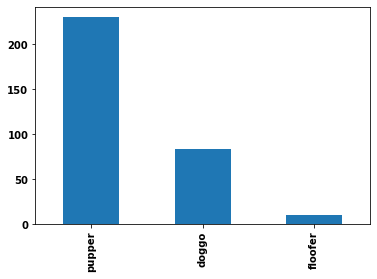

In [980]:
x.plot(kind='bar')

- which one of algorithms has highest conf ?

In [981]:
master_df.p1_conf.mean()

0.6284063821815151

In [982]:
master_df.p2_conf.mean()

0.14321864740649495

In [983]:
master_df.p3_conf.mean()

0.06125768243044125

- based on the mean of each algorith i deside to take p1 to calculate which most common dog in dataset

In [984]:
dog_type2=[]
for i in range(master_df.p1.count()):
        dog_type2.append(master_df['p1'].iloc[i])

In [985]:
dff = pd.DataFrame(dog_type2 , columns= ["type"])

In [986]:
dff.type.value_counts()

golden_retriever                  85
Pembroke                          58
Labrador_retriever                50
Chihuahua                         31
pug                               24
malamute                          19
chow                              19
Samoyed                           18
cocker_spaniel                    16
French_bulldog                    15
toy_poodle                        15
Pomeranian                        14
Staffordshire_bullterrier         14
Chesapeake_Bay_retriever          13
miniature_pinscher                13
Siberian_husky                    13
Great_Pyrenees                    12
Shetland_sheepdog                 11
Cardigan                          11
beagle                            10
German_shepherd                   10
Shih-Tzu                          10
collie                             9
Eskimo_dog                         9
Great_Dane                         9
American_Staffordshire_terrier     8
Maltese_dog                        8
O

In [987]:
top10 = dff.type.value_counts().head(10)
top10

golden_retriever      85
Pembroke              58
Labrador_retriever    50
Chihuahua             31
pug                   24
malamute              19
chow                  19
Samoyed               18
cocker_spaniel        16
French_bulldog        15
Name: type, dtype: int64

In [988]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

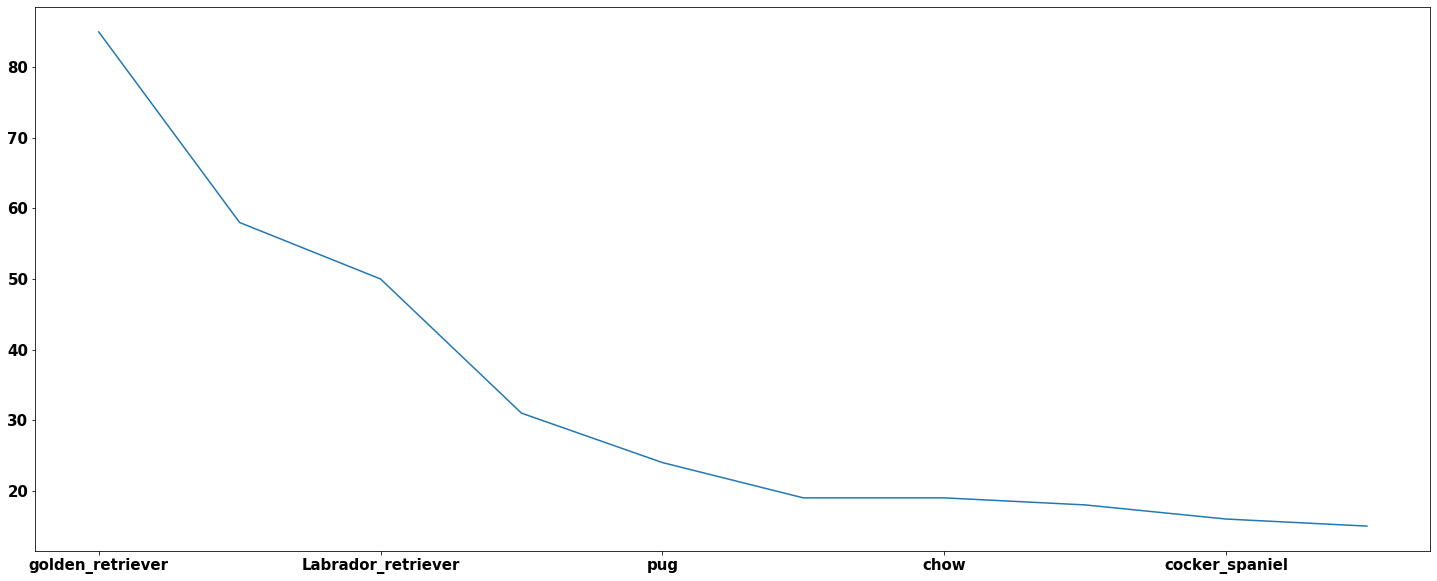

In [989]:
top10.plot(figsize=(25,10) );

- what is the top 5 dog type that got highest rate (single dog )?

In [990]:
d2 = master_df.query('rating_denominator == 10')

In [991]:
d2.rating_numerator.value_counts(sort=True)

12      448
10      385
11      381
13      242
9       128
8        87
7        39
14       29
5        22
6        19
3        10
4         8
2         3
75        1
26        1
27        1
1776      1
Name: rating_numerator, dtype: int64

In [992]:
highestRate = master_df.query('rating_numerator == 14')
highestRate.p1.value_counts().head(5)

Pembroke              3
French_bulldog        2
golden_retriever      2
Pomeranian            1
Bedlington_terrier    1
Name: p1, dtype: int64

###### Pembroke   , French_bulldog    , golden_retriever   , standard_poodle    , Pomeranian  
###### these types got highest rate with 14, the other values like 75 or 27 are not accurate reading from tweet